In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,precision_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [152]:
df= pd.read_csv('student-data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [153]:
df.shape

(395, 31)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [155]:
#checking if there is null values present in the dataset
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

There is no null values present inside the dataset

In [156]:
#describing the dataset
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [157]:
correlation= df.corr()

<AxesSubplot:>

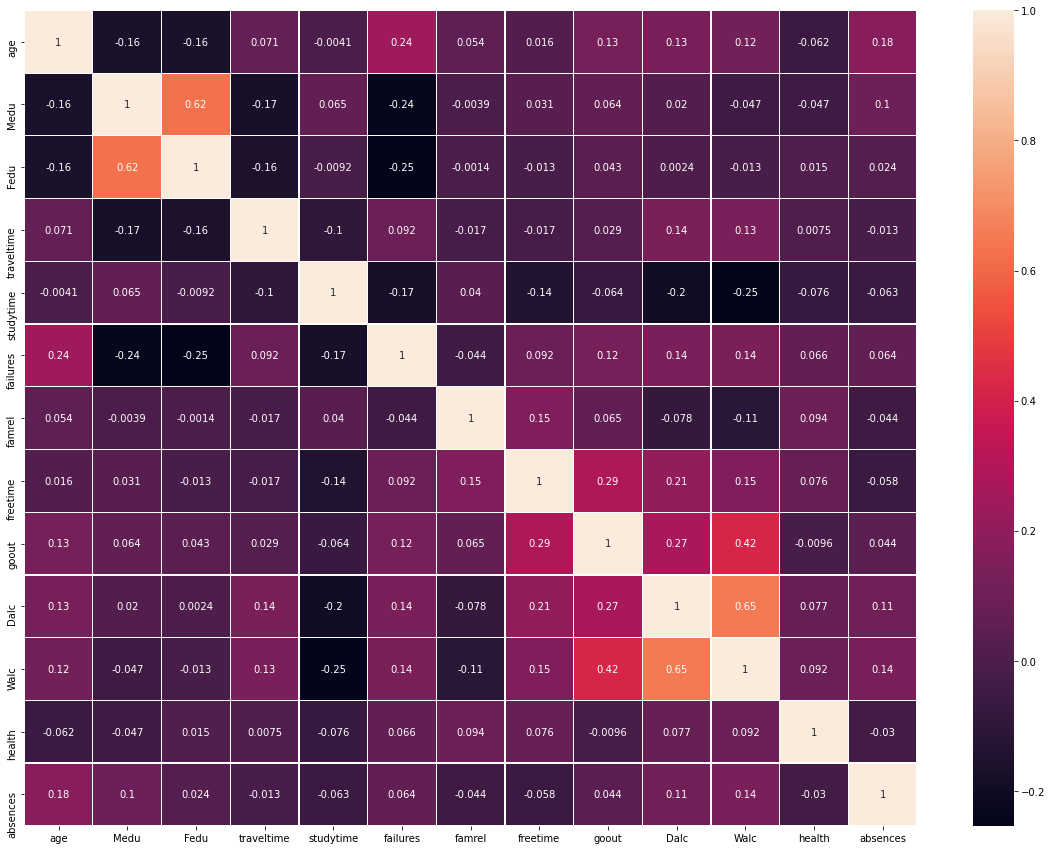

In [158]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation,linewidths=0.2,annot= True)

Here by plotting the heatmap of the correlation of the values from this dataset we can see that father education column and mother education columns are positivly correlated. We need only one of the data. So we can drop mothers education column.Also weekend alcohol consumption and workday alcohol consumption column has high correlation also. We can drop any of the column from these two.

In [159]:
#dropping mothers education column and weekend alcohol consumption column
df= df.drop(['Medu','Walc'],axis=1)

In [160]:
df.head()

,school,sex,age,address,famsize,Pstatus,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,passed
0,GP,F,18,U,GT3,A,4,at_home,teacher,course,...,yes,no,no,4,3,4,1,3,6,no
1,GP,F,17,U,GT3,T,1,at_home,other,course,...,yes,yes,no,5,3,3,1,3,4,no
2,GP,F,15,U,LE3,T,1,at_home,other,other,...,yes,yes,no,4,3,2,2,3,10,yes
3,GP,F,15,U,GT3,T,2,health,services,home,...,yes,yes,yes,3,2,2,1,5,2,yes
4,GP,F,16,U,GT3,T,3,other,other,home,...,yes,no,no,4,3,2,1,5,4,yes


In [161]:
df.shape

(395, 29)

In [162]:
df= df.replace(['yes','no'],[1,0])

In [163]:
df=pd.get_dummies(df)
df.head()

,age,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,2,2,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,2,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,2,3,1,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,15,2,1,3,0,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,1,2,0,0,1,1,0,1,...,1,0,0,0,1,0,0,1,0,0


# USING LOGISTIC REGRESSION

In [164]:
y= df['passed']

In [165]:
X= df.drop(['passed'],axis=1)

In [166]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=40, test_size= 0.2)

In [167]:
print('length of x training data:',len(X_train))
print('length of x testing data:',len(X_test))
print('length of y training data:',len(y_train))
print('length of y testing data:',len(y_test))

length of x training data: 316
length of x testing data: 79
length of y training data: 316
length of y testing data: 79


In [168]:
log_reg= LogisticRegression()

In [169]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [170]:
y_pred=log_reg.predict(X_test)

In [171]:
print('accuracy score:',accuracy_score(y_pred,y_test))
print('f1 score is:',f1_score(y_pred,y_test))

accuracy score: 0.759493670886076
f1 score is: 0.8376068376068376


# USING KNN

In [172]:
knn_ = KNeighborsClassifier()

In [173]:
knn_.fit(X_train,y_train)

KNeighborsClassifier()

In [174]:
y_pred_knn= knn_.predict(X_test)

In [175]:
print('accuracy score:',accuracy_score(y_pred_knn,y_test))
print('f1 score is:',f1_score(y_pred_knn,y_test))

accuracy score: 0.6962025316455697
f1 score is: 0.806451612903226


# DECISION TREE

In [176]:
dt= DecisionTreeClassifier()

In [177]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [178]:
dt_pred= dt.predict(X_test)

In [179]:
print('accuracy score:',accuracy_score(dt_pred,y_test))
print('f1 score is:',f1_score(dt_pred,y_test))

accuracy score: 0.6329113924050633
f1 score is: 0.7339449541284405


OUT OF THESE LOGISTIC REGRESSION IS BEST ALGORITHM SINCE IT GIVES 75% ACCURACY